# Генерация признаков

Дано - категориальный признак 

Задача - получить числовое представление, годное для ML моделей. 

В этом ноутбуке буду пробовать использовать разные методы кодирования и генерации признаков.

Посмотрим, что можно с ними делать 


# Используемые материалы

1. Основа - статься о кодировщиках:

https://habr.com/ru/articles/666234/

2. Еще статься о признаках в целом:

https://nagornyy.me/it/rabota-s-priznakami-kak-chast-mashinnogo-obucheniia/

3. Статься о библиотеке category encoders:

https://konstantinklepikov.github.io/2019/10/28/data-preprocessing-category-encoders.html 

4. Это разобрать на будущее. Статья о применении Random forest для генерации признака:

https://colab.research.google.com/drive/1pVRkaTksyXqbdpfYvTSFuq9rlH2KVSmB


5. Также на будущее. Творчерчкий подход к кодированию:

https://habr.com/ru/companies/megafon/articles/569420/

6. На будущее. Обзор библиотек для генерации признаков:

https://uproger.com/4-biblioteki-python-dlya-avtomatizirovannogo-proektirovaniya-funkczij-kotorye-vam-stoit-ispolzovat-v-2023-godu/?utm_referrer=https://dzen.ru/media/id/5e048b1b2b616900b081f1d9/63d2440c1f5edf7d345d70cb

7. Библиотека category encoders

https://contrib.scikit-learn.org/category_encoders

8. Sklearn

https://scikit-learn.org/1.4/modules/classes.html#module-sklearn.preprocessing


# Импорт данных

In [2]:
import pandas as pd
import numpy as np

Для примера взять датасет с соревнований Тинькофф и ВШЭ по data science. 

Здесь данные о заказах билетов в кино. 

In [3]:
data = pd.read_csv("/home/mikhail/DS_with_sasha/feature engineerig/cinema_successful_orders.csv", delimiter=';')
print(len(data))
data.head(5)

525271


,order_id,creation_date,session_date,movie_id,movie_name,movie_duration,movie_age_restriction,movie_rating,genre_is_triller,genre_is_military,...,number_of_tickets,places,sales_in_cu,ticket_price_in_cu,cinema_name,cinema_address,cinema_latitude,cinema_longitude,cinema_city,client_id
0,2441412,2020-03-07,2020-03-07,32452,Маленькие женщины,135,12+,"7,7","0,0","0,0",...,2,"ряд 5, место 6, ряд 5, место 5","63,29113924050633","31,645569620253166",Каро 10 Щука,"ул. Щукинская, д. 42",55.809469,37.464571,Москва,12419121665619114461
1,2169133,2020-02-03,2020-02-04,32452,Маленькие женщины,135,12+,"7,7","0,0","0,0",...,4,"ряд 15, место 31, ряд 15, место 32, ряд 15, ме...","189,873417721519","47,46835443037975",Каро 11 Октябрь,"ул. Новый Арбат, д. 24",55.753338,37.587615,Москва,8470824369879098013
2,2187694,2020-02-06,2020-02-06,32452,Маленькие женщины,135,12+,"7,7","0,0","0,0",...,2,"ряд 8, место 8, ряд 8, место 9","47,46835443037975","23,734177215189874",Ретро,"ул. Ленина, д. 41",58.634768,59.783538,Лесной,8691480233029300973
3,2182225,2020-02-05,2020-02-05,32452,Маленькие женщины,135,12+,"7,7","0,0","0,0",...,2,"ряд 8, место 6, ряд 8, место 5","47,46835443037975","23,734177215189874",Каро 9 Континент на Звездной,"ул. Ленсовета, 97",59.832425,30.348585,Санкт-Петербург,16386655971521120416
4,2209967,2020-02-08,2020-02-12,32452,Маленькие женщины,135,12+,"7,7","0,0","0,0",...,3,"ряд 5, место 13, ряд 5, место 12, ряд 5, место 11","132,91139240506328","44,30379746835443",Каро 7 Атриум,"ул. Земляной вал, 33",55.757214,37.658941,Москва,9606322045446303245


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525271 entries, 0 to 525270
Data columns (total 46 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   order_id               525271 non-null  int64  
 1   creation_date          525271 non-null  object 
 2   session_date           525271 non-null  object 
 3   movie_id               525271 non-null  int64  
 4   movie_name             525271 non-null  object 
 5   movie_duration         521989 non-null  object 
 6   movie_age_restriction  523648 non-null  object 
 7   movie_rating           525271 non-null  object 
 8   genre_is_triller       525188 non-null  object 
 9   genre_is_military      525188 non-null  object 
 10  genre_is_action        525188 non-null  object 
 11  genre_is_biographical  525188 non-null  object 
 12  genre_is_fairy_tale    525188 non-null  object 
 13  genre_is_science       525188 non-null  object 
 14  genre_is_fantasy       525188 non-nu

Признаков много. Поэтому уберу то, что точно не буду использовать в данном блокноте. 

Просто чтобы не мешалось

In [5]:
cols_to_drop = data.columns[[0, 3] + list(range(8,36)) + [45]]
cols_to_drop

Index(['order_id', 'movie_id', 'genre_is_triller', 'genre_is_military',
       'genre_is_action', 'genre_is_biographical', 'genre_is_fairy_tale',
       'genre_is_science', 'genre_is_fantasy', 'genre_is_historical',
       'genre_is_drama', 'genre_is_animation', 'genre_is_cartoon',
       'genre_is_documentary', 'genre_is_adventure', 'genre_is_fiction',
       'genre_is_childish', 'genre_is_horror', 'genre_is_humor',
       'genre_is_western', 'genre_is_noir', 'genre_is_detective',
       'genre_is_biography', 'genre_is_criminal', 'genre_is_tragicomedy',
       'genre_is_biopic', 'genre_is_mystic', 'genre_is_family',
       'genre_is_comedy', 'genre_is_arthouse', 'client_id'],
      dtype='object')

In [6]:
data.drop(columns = cols_to_drop, inplace = True)

Возьмем небольшой кадр данных, чтобы в будущем на нем проще было играться с примерами

In [7]:
example = data[:500].copy()

И, если в признаке нет nan, то сделаем немножко для примера. Чтобы посмотреть как они обработаются

In [8]:
np.random.seed(7)

In [9]:
for col_name in data.columns:
    if sum(data[col_name].isna())==0:
        random_indices = np.random.choice(example.index, size=10, replace=False)
        example.loc[random_indices, col_name] = None

In [10]:
example.head(3)

,creation_date,session_date,movie_name,movie_duration,movie_age_restriction,movie_rating,number_of_tickets,places,sales_in_cu,ticket_price_in_cu,cinema_name,cinema_address,cinema_latitude,cinema_longitude,cinema_city
0,2020-03-07,2020-03-07,Маленькие женщины,135,12+,"7,7",2.0,"ряд 5, место 6, ряд 5, место 5","63,29113924050633","31,645569620253166",Каро 10 Щука,"ул. Щукинская, д. 42",55.809469,37.464571,Москва
1,2020-02-03,2020-02-04,Маленькие женщины,135,12+,"7,7",4.0,"ряд 15, место 31, ряд 15, место 32, ряд 15, ме...","189,873417721519","47,46835443037975",Каро 11 Октябрь,"ул. Новый Арбат, д. 24",55.753338,37.587615,Москва
2,2020-02-06,2020-02-06,Маленькие женщины,135,12+,"7,7",2.0,"ряд 8, место 8, ряд 8, место 9","47,46835443037975","23,734177215189874",Ретро,"ул. Ленина, д. 41",58.634768,59.783538,Лесной


In [11]:
example.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   creation_date          490 non-null    object 
 1   session_date           490 non-null    object 
 2   movie_name             490 non-null    object 
 3   movie_duration         500 non-null    object 
 4   movie_age_restriction  495 non-null    object 
 5   movie_rating           490 non-null    object 
 6   number_of_tickets      490 non-null    float64
 7   places                 490 non-null    object 
 8   sales_in_cu            490 non-null    object 
 9   ticket_price_in_cu     490 non-null    object 
 10  cinema_name            490 non-null    object 
 11  cinema_address         490 non-null    object 
 12  cinema_latitude        490 non-null    float64
 13  cinema_longitude       490 non-null    float64
 14  cinema_city            490 non-null    object 
dtypes: flo

# Label \  Ordinal Encoder

> Самое простое, что первым приходит на ум - просто проставить уникальным значениям признака число от 0 до n - 1

>>Красный = 0

>>Синий = 1

>>итд

В библиотеке sklearn есть реализация label дл кодирования target 

И Ordinal для признаков

Закодируем название фильма

In [12]:
from sklearn.preprocessing import LabelEncoder,  OrdinalEncoder

#подаем Series
le = LabelEncoder()
le_encoded = le.fit_transform(example['movie_name'])

#Подаем DataFrame, можно сразу несколько столбцов
oe = OrdinalEncoder(dtype=int)
oe_encoded = oe.fit_transform(example[['movie_name', 'cinema_name']])

In [13]:
#Для label получаем одномерный массив
le_encoded

array([ 9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,
       18,  9, 12,  9,  9,  2,  6,  2,  2,  6,  2,  2,  2,  2,  1,  6,  2,
        6,  2,  2,  2,  2,  2,  2,  2, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,  7, 17,  2,  2, 17,  2,
        2,  2, 17,  2, 13,  2,  2,  2,  2, 17, 17,  2, 13,  2,  2,  2, 17,
       16, 16, 16, 16, 16,  7,  7, 16, 16, 16, 16, 16, 16, 16, 18, 16, 16,
       16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 18, 18, 16, 16, 16, 16, 18,
       16, 16, 16, 16, 16, 16, 16, 16, 16, 11, 16, 16, 16, 16, 16, 16, 16,
       16, 16, 16, 16, 16, 16, 16, 16, 16, 16,  6,  6,  2,  2,  2,  2,  2,
        2,  6,  2,  2,  6,  2,  2,  2,  6,  2,  2,  6,  2,  9,  9,  9, 12,
        9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,
        9, 16, 16, 18, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       16, 16, 16, 16,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,
        9,  9,  0,  9,  9

In [14]:
#Для Ordinal двумерный
oe_encoded

array([[  9,  71],
       [  9,  72],
       [  9, 166],
       [  9,  88],
       [  9,  83],
       [  9, 131],
       [  9,  70],
       [  9,  86],
       [  9,  32],
       [  9,  87],
       [  9,  83],
       [  9, 207],
       [  9,  89],
       [  9,  93],
       [  9,  72],
       [  9,  79],
       [  9, 134],
       [ 18,  89],
       [  9,  92],
       [ 12, 186],
       [  9, 103],
       [  9,  21],
       [  2,   4],
       [  6, 128],
       [  2,  10],
       [  2, 221],
       [  6,  98],
       [  2,  46],
       [  2,   4],
       [  2,  58],
       [  2, 186],
       [  1, 113],
       [  6,  98],
       [  2, 194],
       [  6, 154],
       [  2,  67],
       [  2, 190],
       [  2,  47],
       [  2,  47],
       [  2,   3],
       [  2, 178],
       [  2, 102],
       [ 16, 111],
       [ 16, 223],
       [ 16, 116],
       [ 16, 172],
       [ 16, 228],
       [ 16, 174],
       [ 16, 158],
       [ 16, 106],
       [ 16,  50],
       [ 16, 234],
       [ 16,

In [15]:
example.loc[:,'movie_name_le'] = le_encoded

In [16]:
example.loc[:,['movie_name_oe', 'city_name_oe']] = oe_encoded

In [17]:
#индексы, в которых получились none
example[example['movie_name'].isna()].index

Index([17, 99, 112, 113, 118, 190, 263, 296, 344, 490], dtype='int64')

In [18]:
example[['movie_name_le', 'movie_name_oe', 'city_name_oe']].loc[15:25]

,movie_name_le,movie_name_oe,city_name_oe
15,9,9,79
16,9,9,134
17,18,18,89
18,9,9,92
19,12,12,186
20,9,9,103
21,9,9,21
22,2,2,4
23,6,6,128
24,2,2,10


Есть обратная трансформация

In [19]:
le.inverse_transform([9])

array(['Маленькие женщины'], dtype=object)

In [20]:
le.inverse_transform([18])

array([None], dtype=object)

In [21]:
oe.inverse_transform([[18, 10]])

array([[None, 'Cinema 5 МТВ']], dtype=object)

In [22]:
oe.inverse_transform([[4, 100]])

array([['Довод', 'Киномакс (Краснодар)']], dtype=object)

None получил отдельную категорию с номером 18

__Итог__

- Плюсы - Просто и не затратно. 

- Минусы - Создаются зависимости, которых нет. Получается, что если 9 > 4, то "Маленькие женщины" больше\лучше, чем "Довод". Что ерунда

# Frequency encoding

Можно поступить чуть интереснее. 
Присваиваем числа не просто по порядку, а по частоте уникального значения в данных.

Например, для названия фильма, если оно встречается чаще в заказе, значит на него купили больше билетов. Значит фильм популярнее

In [23]:
example['movie_name'].value_counts()

movie_name
Соник в кино                                   152
Дело Ричарда Джуэлла                           127
Маленькие женщины                              101
Иван Царевич и Серый Волк 4                     40
Джуманджи: Новый уровень                        18
Довод                                           15
Ходячий замок                                    9
Достать ножи                                     7
Мульт в кино. Выпуск №117. Что-то новенькое      5
Психо                                            3
Верю в любовь                                    3
МУЛЬТ в кино. Выпуск №113. Друзья навсегда       3
Песня имён                                       2
Правда                                           1
Мой создатель                                    1
Матиас и Максим                                  1
BFF 2020: Под запись                             1
МУЛЬТ в кино. Выпуск №81. Еще веселее!           1
Name: count, dtype: int64

In [24]:
#Считаем количество уникальных значений и нормализуем. 
freq_enc = example["movie_name"].value_counts(normalize=True)

data["movie_name_freq_e"] = data["movie_name"].map(freq_enc)
data.head(4)

,creation_date,session_date,movie_name,movie_duration,movie_age_restriction,movie_rating,number_of_tickets,places,sales_in_cu,ticket_price_in_cu,cinema_name,cinema_address,cinema_latitude,cinema_longitude,cinema_city,movie_name_freq_e
0,2020-03-07,2020-03-07,Маленькие женщины,135,12+,"7,7",2,"ряд 5, место 6, ряд 5, место 5","63,29113924050633","31,645569620253166",Каро 10 Щука,"ул. Щукинская, д. 42",55.809469,37.464571,Москва,0.206122
1,2020-02-03,2020-02-04,Маленькие женщины,135,12+,"7,7",4,"ряд 15, место 31, ряд 15, место 32, ряд 15, ме...","189,873417721519","47,46835443037975",Каро 11 Октябрь,"ул. Новый Арбат, д. 24",55.753338,37.587615,Москва,0.206122
2,2020-02-06,2020-02-06,Маленькие женщины,135,12+,"7,7",2,"ряд 8, место 8, ряд 8, место 9","47,46835443037975","23,734177215189874",Ретро,"ул. Ленина, д. 41",58.634768,59.783538,Лесной,0.206122
3,2020-02-05,2020-02-05,Маленькие женщины,135,12+,"7,7",2,"ряд 8, место 6, ряд 8, место 5","47,46835443037975","23,734177215189874",Каро 9 Континент на Звездной,"ул. Ленсовета, 97",59.832425,30.348585,Санкт-Петербург,0.206122


__Плюсы__

Простота

__Минусы__

Если одна категория встречается одинаково раз, то получается, что это одно и то же (что не так)

(но можно доработать этот момент)

Кажется, что это должно неплохо работать. 

цвета авто, размеры квартир, размеры одежды - частота имеет смысл 

# One-Hot Encoder

Один из самых популярных способов. 

уникальным значениям (n) присваивается n-1 признаков. 

Признаки именуются также, как уникальные значениия. При совпадении строка-столбец 1, иначе 0 

Получаем, что каждое значение кодируется через n-1 признаков

Возьмем для наглядности только уникальные значения

In [25]:
from sklearn.preprocessing import OneHotEncoder

#по умолчанию тип float. Можно сделать dtype
o_h_e = OneHotEncoder(dtype=int)

#на вход датафрейм
one_hot = o_h_e.fit_transform(example[['movie_age_restriction']])

In [26]:
#на выход 2D массив
one_hot.toarray()

array([[0, 1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0],
       ...,
       [0, 1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0]])

In [27]:
pd.DataFrame(one_hot.toarray(), columns=o_h_e.categories_)

,0+,12+,16+,18+,6+,NaN
0,0,1,0,0,0,0
1,0,1,0,0,0,0
2,0,1,0,0,0,0
3,0,1,0,0,0,0
4,0,1,0,0,0,0
...,...,...,...,...,...,...
495,0,1,0,0,0,0
496,0,1,0,0,0,0
497,0,1,0,0,0,0
498,0,1,0,0,0,0


Видим, что категория 12+, например,закодирована как

0 1 0 0 0 0

Метод имеет инверсию

In [28]:
o_h_e.inverse_transform([[0,0,1,1,1,1]])

array([['16+']], dtype=object)

In [29]:
o_h_e.inverse_transform([[0,0,0,0,0,1]])

array([[nan]], dtype=object)

Nan получил свою категорию

__Плюсы__

Метод уже отображается зависимость между признаками

__Минусы__

Если много уникальных значений, то создается слишком много признаков. 

Создается много лишних нулей, что плохо для многих алгоритмов и вычислений

Загоним в one hot названия фильмов из "большого" датасета. Посмотрим что будет

In [30]:
two_hot = OneHotEncoder(dtype=int)

mv_name_one_hot = pd.DataFrame(two_hot.fit_transform(data[['movie_name']]).toarray(), columns=two_hot.categories_)

mv_name_one_hot

,MIEFF 2021. Международный конкурс №1. «По ту сторону дверей»,#АртЛекторийВКино: Импрессионисты,#АртЛекторийВКино: Леонардо. Вся история,#АртЛекторийВКино: Люсьен Фрейд: Автопортрет,#АртЛекторийВКино: Микеланджело: Любовь и смерть,#АртЛекторийВКино: Рембрандт,#АртЛекторийВКино: Удивительный мир Иеронима Босха,#АртЛекторийВкино: Винсент Ван Гог — новый взгляд,#АртЛекторийВкино: Дега: Страсть к совершенству,#АртЛекторийВкино: Мане: Жизнь на холсте,...,Эрмитаж. Сила искусства,Эскобар,Это всего лишь конец света,Я свободен,Я — миллиардер,"Я, Клод Моне",Явление,Яга. Кошмар темного леса,Яга. Кошмар тёмного леса,Ярды
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525266,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
525267,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
525268,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
525269,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Получили 1193 признака и ооооочень много нулей

# Binary Encoder

Почти тот же one hot, но делает меньше признаков. А именно Log(N)

По сути каждому уникальному значению присваивается значение в двоичной системе.

Трюк в том, что, например, для 8 значений достаточно использовать 3 признака, чтобы их закодировать, а не 8:

- 0 0 0 
- 0 0 1
- 0 1 0
- 0 1 1
- 1 0 0
- 1 0 1
- 1 1 0
- 1 1 1



In [33]:
from category_encoders.binary import BinaryEncoder

bn = BinaryEncoder()
binary = bn.fit_transform(example['movie_age_restriction'])
binary.index = example['movie_age_restriction'].values
binary

,movie_age_restriction_0,movie_age_restriction_1,movie_age_restriction_2
12+,0,0,1
12+,0,0,1
12+,0,0,1
12+,0,0,1
12+,0,0,1
...,...,...,...
12+,0,0,1
12+,0,0,1
12+,0,0,1
12+,0,0,1


In [34]:
binary.value_counts()

movie_age_restriction_0  movie_age_restriction_1  movie_age_restriction_2
0                        1                        1                          205
                                                  0                          134
                         0                        1                          124
1                        0                        1                           28
                         1                        0                            5
                         0                        0                            4
Name: count, dtype: int64

In [44]:
binary.loc[np.nan,:]

,movie_age_restriction_0,movie_age_restriction_1,movie_age_restriction_2
NaN,1,1,0
NaN,1,1,0
NaN,1,1,0
NaN,1,1,0
NaN,1,1,0


Есть метод inverse

In [45]:
bn.inverse_transform([[0, 1, 1], [0, 0, 1],[1,1,0]])

,movie_age_restriction
0,6+
1,12+
2,NaN


Nan получил свою категорию

Посмотрим как справится с названиями фильмов

In [47]:
mv_name_bn = bn.fit_transform(data['movie_name'])
mv_name_bn

,movie_name_0,movie_name_1,movie_name_2,movie_name_3,movie_name_4,movie_name_5,movie_name_6,movie_name_7,movie_name_8,movie_name_9,movie_name_10
0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
525266,0,0,0,0,1,1,0,1,0,0,0
525267,0,0,0,0,1,1,0,1,0,0,0
525268,0,0,0,0,1,1,0,1,0,0,0
525269,0,0,0,0,1,1,0,1,0,0,0


__Плюсы__

Создает значительно меньше признаков

__Минусы__

Теряет часть информации

# Contrast Encoding

Целый класс кодировщиков, призванный справится с нулями в one hot

Так же как и One-Hot Encoder кодируют N уникальных признаков несколькими признаками, если быть точнее N-1 признаком, однако они не являются бинарными! Данные признаки принято называть dummy переменными.

Каждая категоря сравнивается с другими, по какому то правилу


**В CE реализованы следующие кодеры:**

- Backward Difference Coding — сравнивается среднее для уровня со средним предыдущего уровня

- Helmert Coding — сравнивается среднее для уровня со средним для всех последующих уровней. Больше подходит для номинальных переменных.

- Sum Coding — сравнивается среднее для уровня со средним для всех остальных уровней

- Polynomial Coding — используются линейные, квадратичные и кубические представления целевой категории. Подходит исключительно для упорядоченных признаков, интервалы между категориями которых одинаковы. Ну и довольно прожорлив по памяти.



## Helmert Encoder 


In [72]:
from category_encoders.helmert import HelmertEncoder

he = HelmertEncoder()
helmet = example[10:20].copy()
transform_helmet = he.fit_transform(helmet[['movie_name']])
cols=['movie_name', 'movie_name_0', 'movie_name_1']
pd.concat([helmet, transform_helmet], axis=1)[cols]

/home/mikhail/anaconda3/lib/python3.11/site-packages/category_encoders/base_contrast_encoder.py:126: FutureWarning: Intercept column might not be added anymore in future releases (c.f. issue #370)
  warnings.warn("Intercept column might not be added anymore in future releases (c.f. issue #370)",
/home/mikhail/anaconda3/lib/python3.11/site-packages/category_encoders/base_contrast_encoder.py:126: FutureWarning: Intercept column might not be added anymore in future releases (c.f. issue #370)
  warnings.warn("Intercept column might not be added anymore in future releases (c.f. issue #370)",


,movie_name,movie_name_0,movie_name_1
10,Маленькие женщины,-1.0,-1.0
11,Маленькие женщины,-1.0,-1.0
12,Маленькие женщины,-1.0,-1.0
13,Маленькие женщины,-1.0,-1.0
14,Маленькие женщины,-1.0,-1.0
15,Маленькие женщины,-1.0,-1.0
16,Маленькие женщины,-1.0,-1.0
17,None,0.0,2.0
18,Маленькие женщины,-1.0,-1.0
19,Мульт в кино. Выпуск №117. Что-то новенькое,1.0,-1.0


Nan получил отдельную категорию 

Не имеет обратного преобразования

## Backward-Difference Encoder 

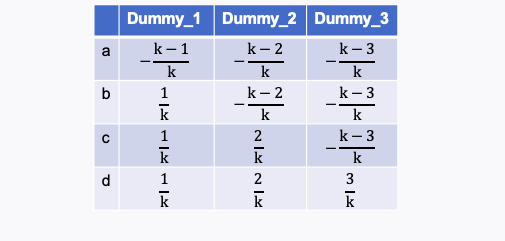

In [73]:
from category_encoders.backward_difference import BackwardDifferenceEncoder

bd = BackwardDifferenceEncoder()
bd.fit_transform(example['movie_name'])

/home/mikhail/anaconda3/lib/python3.11/site-packages/category_encoders/base_contrast_encoder.py:126: FutureWarning: Intercept column might not be added anymore in future releases (c.f. issue #370)
  warnings.warn("Intercept column might not be added anymore in future releases (c.f. issue #370)",
/home/mikhail/anaconda3/lib/python3.11/site-packages/category_encoders/base_contrast_encoder.py:126: FutureWarning: Intercept column might not be added anymore in future releases (c.f. issue #370)
  warnings.warn("Intercept column might not be added anymore in future releases (c.f. issue #370)",


,intercept,movie_name_0,movie_name_1,movie_name_2,movie_name_3,movie_name_4,movie_name_5,movie_name_6,movie_name_7,movie_name_8,movie_name_9,movie_name_10,movie_name_11,movie_name_12,movie_name_13,movie_name_14,movie_name_15,movie_name_16,movie_name_17
0,1,-0.947368,-0.894737,-0.842105,-0.789474,-0.736842,-0.684211,-0.631579,-0.578947,-0.526316,-0.473684,-0.421053,-0.368421,-0.315789,-0.263158,-0.210526,-0.157895,-0.105263,-0.052632
1,1,-0.947368,-0.894737,-0.842105,-0.789474,-0.736842,-0.684211,-0.631579,-0.578947,-0.526316,-0.473684,-0.421053,-0.368421,-0.315789,-0.263158,-0.210526,-0.157895,-0.105263,-0.052632
2,1,-0.947368,-0.894737,-0.842105,-0.789474,-0.736842,-0.684211,-0.631579,-0.578947,-0.526316,-0.473684,-0.421053,-0.368421,-0.315789,-0.263158,-0.210526,-0.157895,-0.105263,-0.052632
3,1,-0.947368,-0.894737,-0.842105,-0.789474,-0.736842,-0.684211,-0.631579,-0.578947,-0.526316,-0.473684,-0.421053,-0.368421,-0.315789,-0.263158,-0.210526,-0.157895,-0.105263,-0.052632
4,1,-0.947368,-0.894737,-0.842105,-0.789474,-0.736842,-0.684211,-0.631579,-0.578947,-0.526316,-0.473684,-0.421053,-0.368421,-0.315789,-0.263158,-0.210526,-0.157895,-0.105263,-0.052632
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,1,-0.947368,-0.894737,-0.842105,-0.789474,-0.736842,-0.684211,-0.631579,-0.578947,-0.526316,-0.473684,-0.421053,-0.368421,-0.315789,-0.263158,-0.210526,-0.157895,-0.105263,-0.052632
496,1,-0.947368,-0.894737,-0.842105,-0.789474,-0.736842,-0.684211,-0.631579,-0.578947,-0.526316,-0.473684,-0.421053,-0.368421,-0.315789,-0.263158,-0.210526,-0.157895,-0.105263,-0.052632
497,1,-0.947368,-0.894737,-0.842105,-0.789474,-0.736842,-0.684211,-0.631579,-0.578947,-0.526316,-0.473684,-0.421053,-0.368421,-0.315789,-0.263158,-0.210526,-0.157895,-0.105263,-0.052632
498,1,-0.947368,-0.894737,-0.842105,-0.789474,-0.736842,-0.684211,-0.631579,-0.578947,-0.526316,-0.473684,-0.421053,-0.368421,-0.315789,-0.263158,-0.210526,-0.157895,-0.105263,-0.052632


__Плюсы__

Менее разреженная матрица, чем у one hot

__Минусы__

Надо понимать логику сравнения и правильно применять

Вссе так же много новых признаков

Побольше вычислений чем one hot

# Target Encoding

Основная цель, объядиняющая данный тип кодировщиков, заключается в использовании целевой метки, для кодирования категориальных признаков.

В статье (3) приведены формулы, ну и + дока.
Тут пока без кода, обзорно, для общего развития

- Target Encoder

для задачи регрессии использует среднее значение целевой метки по данному значению категориального признака.

>Другими словами, если у нас задача предсказания цены авто, целевая метка - цена авто, то каждое значение марки авто в нашем признаке brand кодируется средней ценой автомобиля данного бренда.

для задачи бинарной классификации использует вероятность единичного класса для данного значения категориального признака.

>Другими словами, если у нас задача предсказания цены продажи авто (продано/не продано), единичный класс - успешная продажа авто, то каждое значение марки авто в нашем признаке brand кодируется вероятностью продажи авто.

***Target Encoder реализован "под капотом" в модели градиентного бустинга над решающими деревьями CatBoost!***

- Leave-One-Out Encoder

является расширением Target Encoder'a, в котором, кодирование конкретного объекта обучающей выборки производится с использованием для подсчета среднего/вероятности единичного класса без учета значения данного объекта (т.е мы как раз удаляем его значение, отсюда и происходит название кодировщика). Для тестовой выборки ничем не отличается от Targer Encoder'a.

- James-Stein Encoder.

James-Stein Encoder является некоторым средневзешенным между значениями для данного значения категориального признака и значением для всей выборки. Важным моментом является тот факт, что из формул для веса B, можно сказать, что данный энкодер и его оптимальный параметр B определен корректно и однозначно в случае, когда целевая метка распределена нормально!

# Собственные фичи

Можно применять логику, здравый смысл и доп.данные для генерации новых фичей. 

Пофантазируем, что можно сделать с нашими данными

In [74]:
example.head(3)

,creation_date,session_date,movie_name,movie_duration,movie_age_restriction,movie_rating,number_of_tickets,places,sales_in_cu,ticket_price_in_cu,cinema_name,cinema_address,cinema_latitude,cinema_longitude,cinema_city,movie_name_le,movie_name_oe,city_name_oe
0,2020-03-07,2020-03-07,Маленькие женщины,135,12+,"7,7",2.0,"ряд 5, место 6, ряд 5, место 5","63,29113924050633","31,645569620253166",Каро 10 Щука,"ул. Щукинская, д. 42",55.809469,37.464571,Москва,9,9,71
1,2020-02-03,2020-02-04,Маленькие женщины,135,12+,"7,7",4.0,"ряд 15, место 31, ряд 15, место 32, ряд 15, ме...","189,873417721519","47,46835443037975",Каро 11 Октябрь,"ул. Новый Арбат, д. 24",55.753338,37.587615,Москва,9,9,72
2,2020-02-06,2020-02-06,Маленькие женщины,135,12+,"7,7",2.0,"ряд 8, место 8, ряд 8, место 9","47,46835443037975","23,734177215189874",Ретро,"ул. Ленина, д. 41",58.634768,59.783538,Лесной,9,9,166


Например, можно посчитать разницу между датой сеанса и датой покупки билета

In [85]:
from datetime import datetime

def get_ticket_gap(creation_date, session_date):
    if not pd.isna(creation_date) and not pd.isna(session_date):
        date_format = "%Y-%m-%d"
        creation_date = datetime.strptime(creation_date, date_format)
        session_date = datetime.strptime(session_date, date_format)
        delta = session_date - creation_date
        return delta.days

    

In [86]:
example['ticket_gap'] = example.apply(lambda x: get_ticket_gap(x['creation_date'], x['session_date']), axis=1)

In [87]:
example

,creation_date,session_date,movie_name,movie_duration,movie_age_restriction,movie_rating,number_of_tickets,places,sales_in_cu,ticket_price_in_cu,cinema_name,cinema_address,cinema_latitude,cinema_longitude,cinema_city,movie_name_le,movie_name_oe,city_name_oe,ticket_gap
0,2020-03-07,2020-03-07,Маленькие женщины,135,12+,"7,7",2.0,"ряд 5, место 6, ряд 5, место 5","63,29113924050633","31,645569620253166",Каро 10 Щука,"ул. Щукинская, д. 42",55.809469,37.464571,Москва,9,9,71,0.0
1,2020-02-03,2020-02-04,Маленькие женщины,135,12+,"7,7",4.0,"ряд 15, место 31, ряд 15, место 32, ряд 15, ме...","189,873417721519","47,46835443037975",Каро 11 Октябрь,"ул. Новый Арбат, д. 24",55.753338,37.587615,Москва,9,9,72,1.0
2,2020-02-06,2020-02-06,Маленькие женщины,135,12+,"7,7",2.0,"ряд 8, место 8, ряд 8, место 9","47,46835443037975","23,734177215189874",Ретро,"ул. Ленина, д. 41",58.634768,59.783538,Лесной,9,9,166,0.0
3,2020-02-05,2020-02-05,Маленькие женщины,135,12+,"7,7",2.0,"ряд 8, место 6, ряд 8, место 5","47,46835443037975","23,734177215189874",Каро 9 Континент на Звездной,"ул. Ленсовета, 97",59.832425,30.348585,Санкт-Петербург,9,9,88,0.0
4,2020-02-08,2020-02-12,Маленькие женщины,135,12+,"7,7",3.0,"ряд 5, место 13, ряд 5, место 12, ряд 5, место 11","132,91139240506328","44,30379746835443",Каро 7 Атриум,"ул. Земляной вал, 33",55.757214,37.658941,Москва,9,9,83,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,2020-02-06,2020-02-07,Маленькие женщины,135,12+,"7,7",1.0,"ряд 5, место 11","88,60759493670886","88,60759493670886",Каро 7 Атриум,"ул. Земляной вал, 33",55.757214,37.658941,Москва,9,9,83,1.0
496,2020-02-11,2020-02-11,Маленькие женщины,135,12+,"7,7",1.0,"ряд 5, место 2","23,734177215189874","23,734177215189874",Синема Стар Марьина Роща,"Шереметьевская ул., 6 корп. 1",55.795433,37.617141,Москва,9,9,206,0.0
497,2020-02-01,2020-02-03,Маленькие женщины,135,12+,"7,7",2.0,"ряд 12, место 5, ряд 12, место 4","56,962025316455694","28,481012658227847",Москино Вымпел,"ул. Коминтерна, д. 8",55.861969,37.676825,Москва,9,9,147,2.0
498,2020-02-06,2020-02-07,Маленькие женщины,135,12+,"7,7",5.0,"ряд 5, место 9, ряд 5, место 10, ряд 5, место ...","348,1012658227848","69,62025316455696",Каро Sky 17 Авиапарк,"ул. Авиаконструктора Микояна, д. 10",55.790232,37.530826,Москва,9,9,89,1.0


__Плюсы__

Если разбираться в теме, то это интуитивно должно быть лучшим способом. Т.к получается настоящая зависимость

__Минусы__

Процесс творческий, не всегда получится вытащить что-то интересное 

# Хеширование

Способ заключается в использовании hash функции.

1. Определяется __фиксированное__ количество 'корзин', которое хотим получить (numbuckets)

1.1 (можно сделать реализацию, которая будет разбивать на numbuckets признаков, как в sklearn)

2. Считается hash функция от значения признака
3. Чтобы вписать результат в наши корзины просто делим с остатком на numbuckets. Получаем число

"Своя" реализация

In [92]:
import itertools
import hashlib
import pandas as pd

def hashed(value, numbuckets):
    return abs(int(hashlib.md5(value.encode('utf-8')).hexdigest(), 16) % numbuckets)

In [93]:
def my_hash(word, n_buckets):
    return hash(word) % n_buckets

In [94]:
data['movie_name_my_hashed'] = data['movie_name'].apply(lambda x: hashed(x, 7))
data.head(5)

,creation_date,session_date,movie_name,movie_duration,movie_age_restriction,movie_rating,number_of_tickets,places,sales_in_cu,ticket_price_in_cu,cinema_name,cinema_address,cinema_latitude,cinema_longitude,cinema_city,movie_name_freq_e,movie_name_my_hashed
0,2020-03-07,2020-03-07,Маленькие женщины,135,12+,"7,7",2,"ряд 5, место 6, ряд 5, место 5","63,29113924050633","31,645569620253166",Каро 10 Щука,"ул. Щукинская, д. 42",55.809469,37.464571,Москва,0.206122,6
1,2020-02-03,2020-02-04,Маленькие женщины,135,12+,"7,7",4,"ряд 15, место 31, ряд 15, место 32, ряд 15, ме...","189,873417721519","47,46835443037975",Каро 11 Октябрь,"ул. Новый Арбат, д. 24",55.753338,37.587615,Москва,0.206122,6
2,2020-02-06,2020-02-06,Маленькие женщины,135,12+,"7,7",2,"ряд 8, место 8, ряд 8, место 9","47,46835443037975","23,734177215189874",Ретро,"ул. Ленина, д. 41",58.634768,59.783538,Лесной,0.206122,6
3,2020-02-05,2020-02-05,Маленькие женщины,135,12+,"7,7",2,"ряд 8, место 6, ряд 8, место 5","47,46835443037975","23,734177215189874",Каро 9 Континент на Звездной,"ул. Ленсовета, 97",59.832425,30.348585,Санкт-Петербург,0.206122,6
4,2020-02-08,2020-02-12,Маленькие женщины,135,12+,"7,7",3,"ряд 5, место 13, ряд 5, место 12, ряд 5, место 11","132,91139240506328","44,30379746835443",Каро 7 Атриум,"ул. Земляной вал, 33",55.757214,37.658941,Москва,0.206122,6


Реализация sklearn

In [96]:
from sklearn.feature_extraction import FeatureHasher
h = FeatureHasher(n_features=7, input_type='string')
f = h.transform(example['movie_name'].dropna().apply(lambda x: [x]))
pd.DataFrame(f.toarray())

,0,1,2,3,4,5,6
0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,-1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,-1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,-1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,-1.0
...,...,...,...,...,...,...,...
485,0.0,0.0,0.0,0.0,0.0,0.0,-1.0
486,0.0,0.0,0.0,0.0,0.0,0.0,-1.0
487,0.0,0.0,0.0,0.0,0.0,0.0,-1.0
488,0.0,0.0,0.0,0.0,0.0,0.0,-1.0


__Плюсы__

Этот способ не требует заранее знать все возможные значения признака и обрабатывает новые

__Минусы__

Надо считать

Все таки, зависимость оттражается не максимально корректно. 